<a href="https://colab.research.google.com/github/BioMachineLearn/BioMachineLearn/blob/main/test_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
vim= pd.read_excel(r"/content/test_model.xlsx")


In [18]:
vim.head()

,Strain ID,isolation country,isolation source,genome size,ST,tn402 associated to VIM
0,GCA_002029925.1,Brazil: Sao Paulo,clinical,7019286,233,0
1,GCA_002351425.1,Brazil: Sao Paulo,environmental/other,6980737,233,0
2,GCA_002351435.1,Brazil: Sao Paulo,clinical,7029318,233,0
3,GCA_000797395.1,Canada,clinical,7335469,111,0
4,GCA_008386455.1,Chile: Concepcion,clinical,7118355,3348,0


In [19]:
vim.describe()

,genome size,tn402 associated to VIM
count,1.150000e+02,115.000000
mean,7.042127e+06,0.460870
std,2.135439e+05,0.500648
min,6.493130e+06,0.000000
25%,6.907569e+06,0.000000
50%,7.019286e+06,0.000000
75%,7.173506e+06,1.000000
max,7.554386e+06,1.000000


In [36]:
print(vim['tn402 associated to VIM'].value_counts("isolation source"))

0    0.53913
1    0.46087
Name: tn402 associated to VIM, dtype: float64


In [38]:
print(vim['isolation source'].value_counts('tn402 associated to VIM'))

clinical               0.93913
environmental/other    0.06087
Name: isolation source, dtype: float64


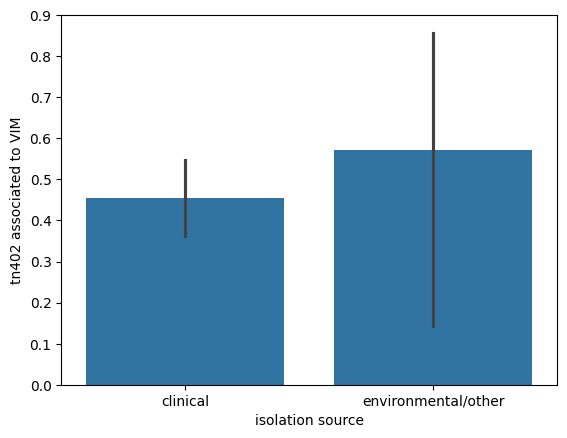

In [35]:
sns.barplot(y="tn402 associated to VIM", x="isolation source", data=vim)

plt.show()

In [47]:
vimG= vim.groupby(['isolation source', 'tn402 associated to VIM']).count()

In [48]:
vimG


Strain ID  isolation country  \
isolation source    tn402 associated to VIM                                 
clinical            0                               59                 59   
                    1                               49                 49   
environmental/other 0                                3                  3   
                    1                                4                  4   

                                             genome size  ST  
isolation source    tn402 associated to VIM                   
clinical            0                                 59  59  
                    1                                 49  49  
environmental/other 0                                  3   3  
                    1                                  4   4

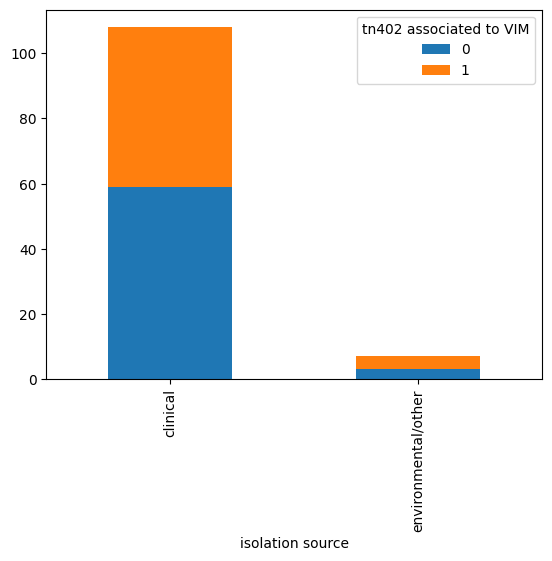

In [65]:
vimG = vim.groupby(['isolation source', 'tn402 associated to VIM']).size().reset_index(name='count')
vimG_pivot = vimG.pivot(index='isolation source', columns='tn402 associated to VIM', values='count')
vimG_pivot.plot(kind='bar', stacked=True)
plt.show()

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vim['isolation source'] = label_encoder.fit_transform(vim['isolation source'])
vim['isolation country'] = label_encoder.fit_transform(vim['isolation country'])

In [76]:
vim

,Strain ID,isolation country,isolation source,genome size,ST,tn402 associated to VIM
0,GCA_002029925.1,0,0,7019286,233,0
1,GCA_002351425.1,0,1,6980737,233,0
2,GCA_002351435.1,0,0,7029318,233,0
3,GCA_000797395.1,1,0,7335469,111,0
4,GCA_008386455.1,2,0,7118355,3348,0
...,...,...,...,...,...,...
110,GCA_001086635.1,55,0,7547174,235,1
111,GCA_001086725.1,55,0,7085577,823,1
112,GCA_004795645.1,56,0,7089704,111,0
113,GCA_000795535.1,60,0,7038646,308,0


In [90]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(vim['isolation source'], vim['tn402 associated to VIM'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 0.045933505782105866
P-value: 0.8302967160440734


In [91]:
from sklearn.metrics import jaccard_score


# Calculate Jaccard similarity
jaccard_similarity = jaccard_score(vim['isolation source'], vim['tn402 associated to VIM'] )

print(f"Jaccard Similarity: {jaccard_similarity}")

Jaccard Similarity: 0.07142857142857142


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = vim[['isolation source']]  # Predictor variable
y = vim['tn402 associated to VIM']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5652173913043478
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.50      0.10      0.17        10

    accuracy                           0.57        23
   macro avg       0.54      0.51      0.44        23
weighted avg       0.54      0.57      0.47        23



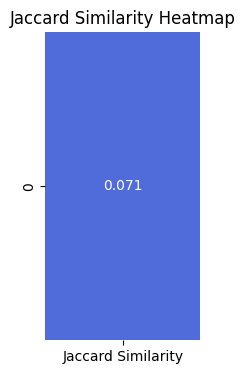

In [100]:
jaccard_df = pd.DataFrame([[jaccard_similarity]], columns=['Jaccard Similarity'])

# Plot the heatmap
plt.figure(figsize=(2, 4))
sns.heatmap(jaccard_df, annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=1)
plt.title('Jaccard Similarity Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


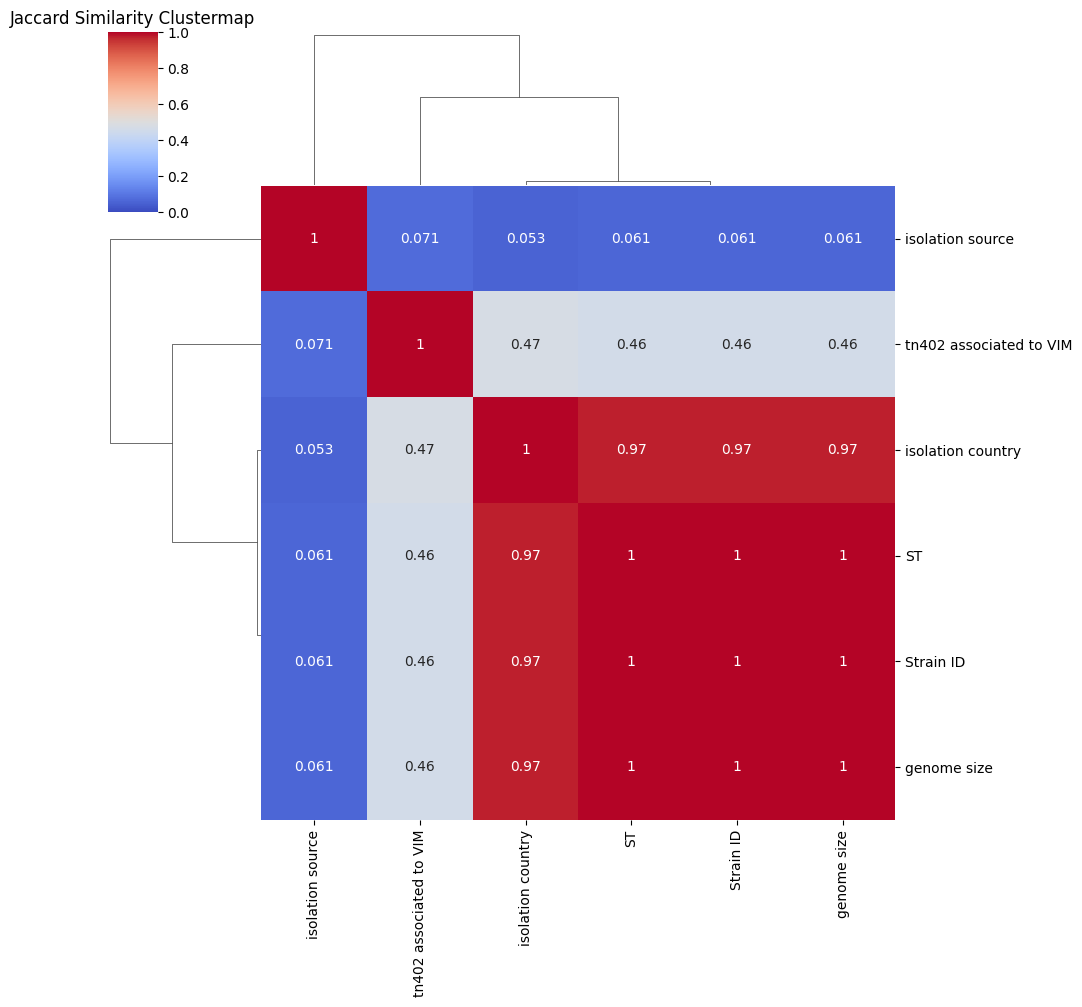

In [105]:
from sklearn.metrics import pairwise_distances
jaccard_distances = pairwise_distances(vim.T.values, metric='jaccard')
jaccard_similarities = 1 - jaccard_distances

# Create a DataFrame with pairwise Jaccard similarities
jaccard_df = pd.DataFrame(jaccard_similarities, columns=vim.columns, index=vim.columns)

# Create a clustermap
sns.clustermap(jaccard_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Jaccard Similarity Clustermap')
plt.show()